In [1]:
import cv2
import numpy as np
import os
import time
from mtcnn.mtcnn import MTCNN

In [2]:
skip = 0
face_data = []
SAVED_FILE = 'faces'
fps = 0
prev_time = time.time()
FF = cv2.FONT_HERSHEY_SIMPLEX
FZ = 0.5
FT = 1
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
detector = MTCNN()

In [3]:
def get_fps():
    global prev_time
    # Calculate and display FPS
    curr_time = time.time()
    fps = 1 / (curr_time - prev_time)
    prev_time = curr_time
    return f"FPS: {fps:.2f}"

In [4]:
file_name = 'Senghout'

faces_img_path = os.path.join('faces_img', file_name)

In [5]:
# file_name = input("Enter the name of the person: ")

# faces_img_path = os.path.join('faces_img', file_name)

# cap = cv2.VideoCapture(1)

# detector = MTCNN()

# while True:
#     ret, frame = cap.read()

#     if not ret:
#         continue
    
#     small_frame = cv2.resize(frame, (0, 0), fx=0.5, fy=0.5)
    
#     # Detect faces using MTCNN
#     results = detector.detect_faces(small_frame)

#     if results:
#         for detection in results:
#             # Extract bounding box and confidence score
#             x, y, w, h = detection['box']
#             confidence = detection['confidence']

#             if confidence < 0.9:  # Set a threshold for face detection
#                 continue

#             # Draw bounding box
#             cv2.rectangle(small_frame, (x, y), (x+w, y+h), (0, 255, 255), FT)

#             # Extract and preprocess the face section
#             face_section = small_frame[y:y+h, x:x+w]
#             face_section = cv2.resize(face_section, (100, 100))

#             # Save every 5th small_frame
#             skip += 1
#             if skip % 5 == 0:
#                 os.makedirs(faces_img_path, exist_ok=True)
#                 path = os.path.join(faces_img_path, file_name + '.' + str(len(face_data)) + '.jpg')
#                 cv2.imwrite(path, face_section)
#                 face_data.append(face_section)
#                 print(f"Captured {len(face_data)} images")


#     cv2.putText(small_frame, get_fps(), (10, 20), FF, FZ, (0, 255, 255), FT)
#     cv2.putText(small_frame, 'Saving: {}'.format(str(len(face_data))), (10, 40), FF, FZ, (255, 255, 255), FT)
    
#     # Display the video feed with detections
#     cv2.imshow("Face Collection ^◊^ ", small_frame)

#     # Break loop if 'q' is pressed
#     key_pressed = cv2.waitKey(1) & 0xFF
#     if key_pressed == ord('q'):
#         break

# cap.release()
# cv2.destroyAllWindows()

In [6]:
detected_faces = []

for idx, img_path in enumerate(os.listdir(faces_img_path)):
    full_img_path = os.path.join(faces_img_path, img_path)
    if img_path.endswith('.jpg'):
        img = cv2.imread(full_img_path)
        
        if img is not None:
            # Detect faces using MTCNN
            detections = detector.detect_faces(img)
            
            # convert to gray
            gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

            # Draw bounding boxes around detected faces
            for detection in detections:
                x, y, w, h = detection['box']
                confidence = detection['confidence']

                # Apply confidence threshold
                if confidence > 0.9:
                    
                    # Extract the face region
                    face = gray_img[y:y+h, x:x+w]
                    
                    # resize
                    face = cv2.resize(face, (100, 100))
                    
                    # Draw rectangle around detected face
                    cv2.rectangle(img, (x, y), (x + w, y + h), (236, 66, 245), 1)
                
                    # Display the image with detections
                    cv2.imshow(str(idx), img)
            
                    # Wait for user input
                    key = cv2.waitKey(0) & 0xFF

                    # Press 's' to save the image
                    if key == ord('s'):
                        idx +=1
                        detected_faces.append(face)

                    # Press 'd' to delete the image
                    elif key == ord('d'):
                        os.remove(full_img_path)

            # Close the image window
            cv2.destroyWindow("Image v2")

        else:
            print(f"Failed to read image: {full_img_path}")
    else:
        print(f"Invalid image file: {full_img_path}")

# Final cleanup
cv2.destroyAllWindows()

Invalid image file: faces_img/Senghout/.DS_Store


In [7]:
len(detected_faces)

99

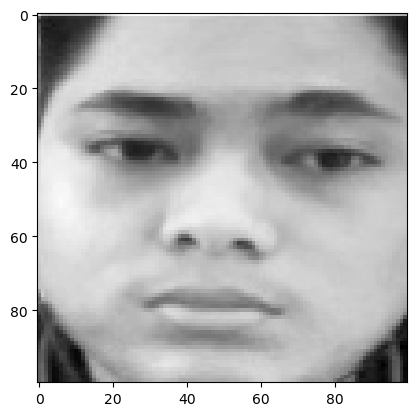

In [8]:
import matplotlib.pyplot as plt

plt.imshow(detected_faces[-1], cmap='gray')
plt.show()

In [9]:
len(detected_faces)

99

In [10]:
detected_faces = np.asarray(detected_faces)
detected_faces.shape

(99, 100, 100)

In [11]:
detected_faces = detected_faces.reshape((detected_faces.shape[0], -1))
detected_faces.shape

(99, 10000)

In [12]:
os.makedirs(SAVED_FILE, exist_ok=True)
path = os.path.join(SAVED_FILE, file_name + '.npy')
np.save(path, detected_faces)
print("Data saved at  {}".format(path))

Data saved at  faces/Senghout.npy
